<img src="https://i.imgur.com/6U6q5jQ.png"/>







# Graphs

Let me show you a graph (from [wikipedia](https://en.wikipedia.org/wiki/Graph_(discrete_mathematics))):

<img src="https://upload.wikimedia.org/wikipedia/commons/thumb/5/5b/6n-graf.svg/440px-6n-graf.svg.png"/>

As you can see, it is simply a representation of two sets:

1. A set of **vertices** or **nodes**. In the image above you see the nodes _1_, _2_, _3_, _4_, _5_, and _6_.
2. A set of **edges** or **links**. In the image above, the links are connecting pairs of nodes. 

Altogether, a _graph_ reveals some _relationship_ among the _nodes_. The graph structure will allow us to explore and understand that relationship. 

## Creating Graphs

The graph above can be represented computationally in Python using **networkx**:

In [1]:
import networkx as nx

# create graph
G = nx.Graph()

# create nodes and edges
G.add_edges_from([(1, 2), (1, 5),(2,5),(2,3),(3,4),(4,5),(4,6)])

## Basic Elements

**G** is the graph:

In [2]:
#you don't see much...just what it is:
G

In [3]:
# You see nodes
G.nodes()

NodeView((1, 2, 5, 3, 4, 6))

In [4]:
# You see edges
G.edges()

EdgeView([(1, 2), (1, 5), (2, 5), (2, 3), (5, 4), (3, 4), (4, 6)])

## Drawing

As you can see, the graph is created by adding pairs of nodes. Once you complete that stage, you can draw the graph:

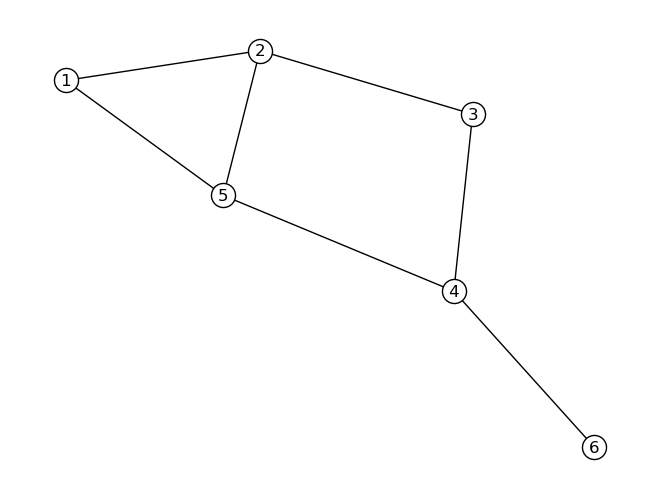

In [5]:
# draw
nx.draw(G,
        with_labels=True,
        node_color='white',
        edgecolors='black')

In [14]:
from pyvis.network import Network
nt = Network('500px', '500px',notebook=True,cdn_resources='remote')
nt.from_nx(G)
nt.show('nx.html')

nx.html


Notice that the position of the nodes will vary every time you re draw the graph. In fact, drawing a graph can become a challenge by itself when we need to find information via visualization. 

### Edge directionality

The graph we created and drew represented an **undirected** graph, that is, the relationships between a pair of nodes are **symmetric**: the relationships can not represent direction because they are _inherently mutual_ between the nodes. For example, the relationship *to be a neighbor of* is symmetric.

The following graph is **directed** (also from wikipedia):

<img src="https://upload.wikimedia.org/wikipedia/commons/thumb/2/23/Directed_graph_no_background.svg/340px-Directed_graph_no_background.svg.png"/>


You can create this directed graph this way:

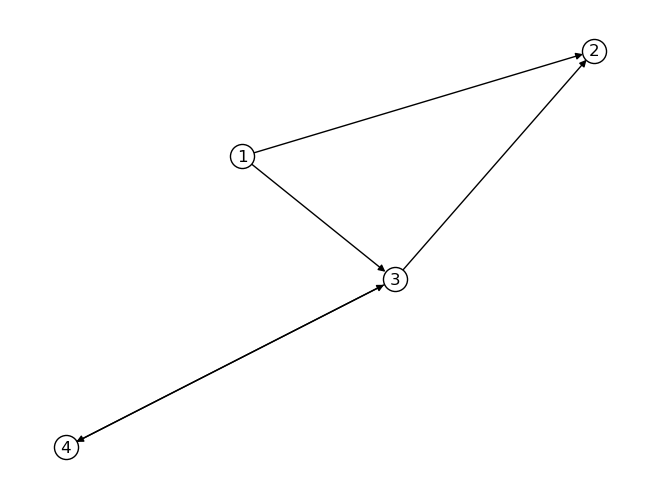

In [6]:
# create graph
dG = nx.DiGraph()

# create nodes and edges
dG.add_edges_from([(1, 2), (1, 3),(3,2),(3,4),(4,3)])

# drawing
nx.draw(dG,with_labels=True,node_color='white',edgecolors='black')

Directed links are also called **arcs**. Notice the _DiGraph_ created represents an **asymmetric** relationship: the relationship a node has with another node does not need to be mutual, but could be (see nodes _3_ and _4_). If the arcs represent **cares for someone**, it shows that the feeling is not reciprocal for most cases in this graph. If a relationship is not mutual, and can only be in one direction, it is called **anti symmetric**.

## Attributes

Nodes can have attributes:

In [7]:
# adding attributes
dG.nodes[1]["sex"]='male'
dG.nodes[2]["sex"]='male'
dG.nodes[3]["sex"]='female'
dG.nodes[4]["sex"]='female'

In [8]:
# seeing attributes
dG.nodes.data()

NodeDataView({1: {'sex': 'male'}, 2: {'sex': 'male'}, 3: {'sex': 'female'}, 4: {'sex': 'female'}})

Attributes can serve for some computational purposes, but also help to visually find structures.

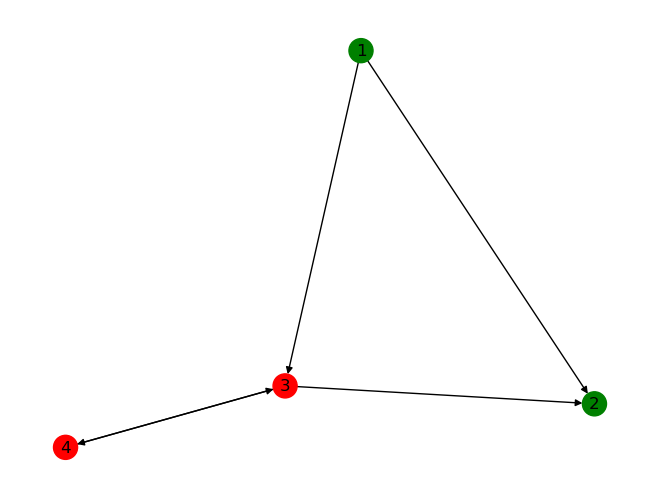

In [9]:
# using node attributes

colors_for_nodes=['green' if n[1]['sex']=='male' else 'red' for n in dG.nodes.data()]
nx.draw(dG,
        with_labels=True,
        node_color=colors_for_nodes)

Of course, edges can have attributes too:

In [10]:
dG.edges[(1, 2)]['weight']=1
dG.edges[(1, 3)]['weight']=3
dG.edges[(3, 2)]['weight']=5
dG.edges[(3, 4)]['weight']=10
dG.edges[(4, 3)]['weight']=0.5

In [11]:
# see them
dG.edges.data()

OutEdgeDataView([(1, 2, {'weight': 1}), (1, 3, {'weight': 3}), (3, 2, {'weight': 5}), (3, 4, {'weight': 10}), (4, 3, {'weight': 0.5})])

Let me add another attribute conditional on another attribute:

In [12]:
# all edges will have the attribute color, and everyy edge will have 'black'
nx.set_edge_attributes(dG,values='grey',name='color')

# updating 'color' attribute:
for x in nx.get_edge_attributes(dG,'weight').items(): 
    if  dG.edges[x[0]]['weight']<1:
        dG.edges[x[0]].update({'color': 'magenta'}) 

In [13]:
# see them again
dG.edges.data()

OutEdgeDataView([(1, 2, {'weight': 1, 'color': 'grey'}), (1, 3, {'weight': 3, 'color': 'grey'}), (3, 2, {'weight': 5, 'color': 'grey'}), (3, 4, {'weight': 10, 'color': 'grey'}), (4, 3, {'weight': 0.5, 'color': 'magenta'})])

Let's use edge attributes:

In [14]:
#notice
#Getting some values
weight_values = nx.get_edge_attributes(dG,'weight') # recovering 'weights'
weight_values

{(1, 2): 1, (1, 3): 3, (3, 2): 5, (3, 4): 10, (4, 3): 0.5}

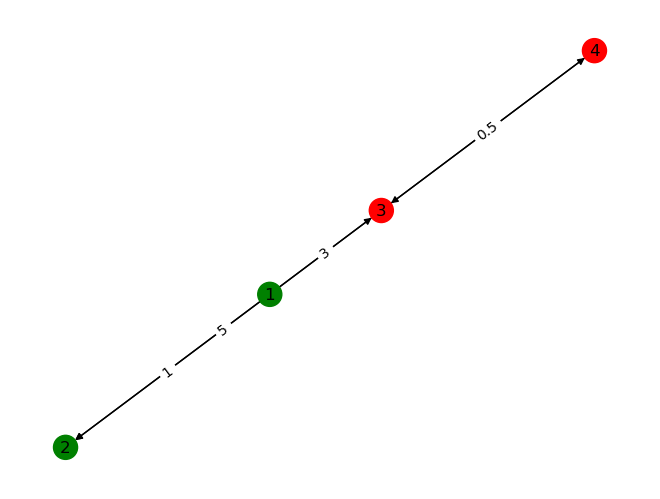

In [15]:
# use the edge attributes
# add labels to edges
            
pos = nx.spring_layout(dG) # position of the nodes
nx.draw(dG,
        pos, # using "position"
        with_labels=True,
        node_color=colors_for_nodes)
# adding labels
final_dG=nx.draw_networkx_edge_labels(dG,pos,edge_labels=weight_values)

The color of edges:

In [16]:
nx.get_edge_attributes(dG,'color') # recovering 'color'

{(1, 2): 'grey',
 (1, 3): 'grey',
 (3, 2): 'grey',
 (3, 4): 'grey',
 (4, 3): 'magenta'}

In [17]:
nx.get_edge_attributes(dG,'color').values()

dict_values(['grey', 'grey', 'grey', 'grey', 'magenta'])

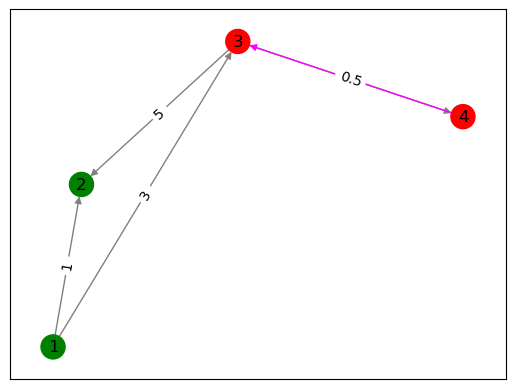

In [18]:
# use the edge attributes
# add labels to edges
# add color to edges

edge_colors=nx.get_edge_attributes(dG,'color').values()

pos = nx.spring_layout(G) 

# draw nodes first
nx.draw_networkx_nodes(dG,pos,
                       node_color=colors_for_nodes)
# draw edges
nx.draw_networkx_edges(dG, pos,
                       edge_color= edge_colors)
# draw node labels
nx.draw_networkx_labels(dG, pos)

final_dG=nx.draw_networkx_edge_labels(dG,pos,
                               edge_labels=weight_values)

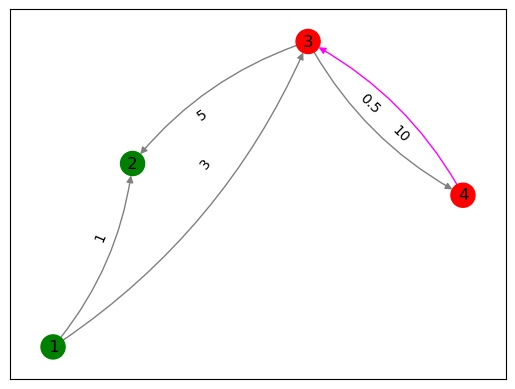

In [19]:
# use the edge attributes
# add labels to edges
# add color to edges
# change style of edge
            
pos = nx.spring_layout(G) # position of the nodes

# draw nodes first
nx.draw_networkx_nodes(dG,pos,
                       node_color=colors_for_nodes)
# draw edges
nx.draw_networkx_edges(dG, pos,
                       edge_color= edge_colors,
                       connectionstyle="arc3,rad=0.15" )
# draw node labels
nx.draw_networkx_labels(dG, pos)

final_dG=nx.draw_networkx_edge_labels(dG,pos,label_pos=0.40,
                                      edge_labels=weight_values)


Remember:

In [20]:
weight_values

{(1, 2): 1, (1, 3): 3, (3, 2): 5, (3, 4): 10, (4, 3): 0.5}

Notice the use of enumerate:

In [21]:
[(i,e) for i,e in enumerate(dG.edges.data())]

[(0, (1, 2, {'weight': 1, 'color': 'grey'})),
 (1, (1, 3, {'weight': 3, 'color': 'grey'})),
 (2, (3, 2, {'weight': 5, 'color': 'grey'})),
 (3, (3, 4, {'weight': 10, 'color': 'grey'})),
 (4, (4, 3, {'weight': 0.5, 'color': 'magenta'}))]

In [22]:
{(e[0],e[1]):e[2]['weight'] for i,e in enumerate(dG.edges.data())}

{(1, 2): 1, (1, 3): 3, (3, 2): 5, (3, 4): 10, (4, 3): 0.5}

[{(1, 2): Text(-0.6208809855822826, -0.38770420490712004, '1')},
 {(1, 3): Text(-0.2011265690494434, -0.3411309785723614, '3')},
 {(3, 2): Text(-0.11869808320548593, -0.4621859209819653, '5')},
 {(3, 4): Text(0.3713580936634992, 0.0008421077263578436, '10')},
 {(4, 3): Text(0.34792417355145056, -0.13797615973149696, '0.5')}]

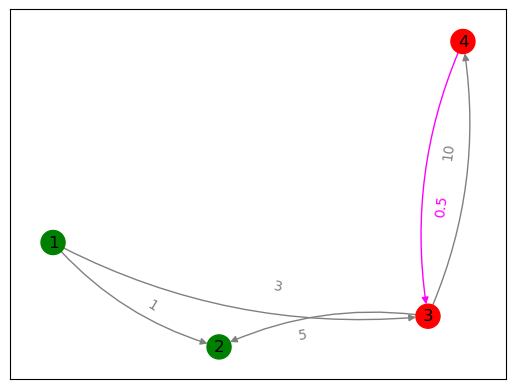

In [23]:
# use the edge attributes
# add labels to edges
# add color to edges
# change style of edge
# coloring edge labels (one at a time)
            
pos = nx.spring_layout(G) # position of the nodes

# draw nodes first
nx.draw_networkx_nodes(dG,pos,
                       node_color=colors_for_nodes)
# draw edges
nx.draw_networkx_edges(dG, pos,
                       edge_color= edge_colors,
                       connectionstyle="arc3,rad=0.15" )
# draw node labels
nx.draw_networkx_labels(dG, pos)

[nx.draw_networkx_edge_labels(dG,pos,edge_labels={(e[0],e[1]):e[2]['weight']},
                              font_color=e[2]['color'],label_pos=0.40) for i,e in enumerate(dG.edges.data())]

[{(1, 2): Text(-0.6233688038284537, 0.3992109915223461, '1')},
 {(1, 3): Text(-0.20058705424720277, 0.34852552956154054, '3')},
 {(3, 2): Text(-0.11573728286312178, 0.47241016916337897, '5')},
 {(3, 4): Text(0.37534414653516945, -0.0017138773133974217, '10')},
 {(4, 3): Text(0.352577586596156, 0.13943231752525947, '0.5')}]

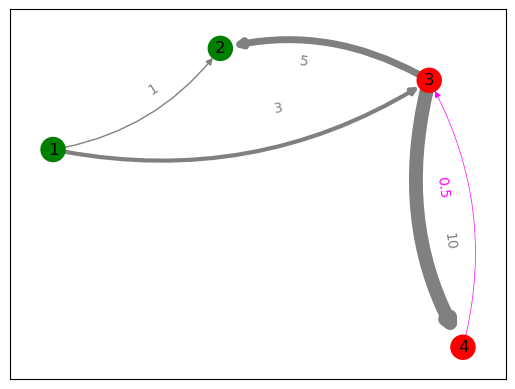

In [24]:
# use the edge attributes
# NO labels to edges, weight for thickness
# add color to edges
# change style of edge


pos = nx.spring_layout(G) # position of the nodes

# draw nodes first
nx.draw_networkx_nodes(dG,pos,
                       node_color=colors_for_nodes)
# draw edges
nx.draw_networkx_edges(dG, pos,
                       width=list(weight_values.values()),
                       edge_color= edge_colors,
                       connectionstyle="arc3,rad=0.2" )
# draw node labels
nx.draw_networkx_labels(dG, pos)

[nx.draw_networkx_edge_labels(dG,pos,edge_labels={(e[0],e[1]):e[2]['weight']},
                              font_color=e[2]['color'],label_pos=0.40) for i,e in enumerate(dG.edges.data())]

## Exporting

Network does not recommend its use for complex visualization. So, several times you may want to export your graph to be visualize in Gephi or something similar:

In [25]:
nx.write_graphml(dG, "dG.graphml",encoding='utf-8')

# Case: Elites in Peru

The network we are going to build is based on the relationships studied in this paper:
<img src="graphdata/paper.png" width="900">


In that paper, Professor Figueroa shows this table, where 1 represents that both nodes (families) appear together at least once in a top company board. Notice the last column is an attribute:

<img src="graphdata/dataRed.png" width="900">

This is an spreadsheet, representing the information above:

<img src="graphdata/dataExcel.png" width="900">

Let's use the data from the spreadsheet to prepare our table:

In [26]:
# reading in
import pandas as pd
import os

FigueData = pd.read_excel(os.path.join("graphdata","dataFigueroa.xlsx"),
                          index_col=0) #notice!!!!!

We got this:

In [27]:
FigueData.head()

,Romero,Graña,Miro Quesada,Moreyra,Fort,De La Puente,Wiese,Onrubia,Brescia,Nicolini,...,Batievsky Spack,Matos Escalada,Galsky,Lucioni,Rodriguez Rodríguez,Custer,Ikeda,Cogorno,Arias Davila,Multinacional
Romero,1,1,1,1,1,1,0,1,1,1,...,0,0,0,0,0,0,0,0,0,1
Graña,1,1,1,0,1,1,1,0,0,0,...,0,0,0,0,0,0,0,0,0,1
Miro Quesada,1,1,1,0,1,1,1,0,0,0,...,0,0,0,0,0,0,0,0,0,1
Moreyra,1,0,0,1,1,1,1,1,1,0,...,0,0,0,0,0,0,0,0,0,1
Fort,1,1,1,1,1,1,0,1,1,1,...,0,0,0,0,0,0,0,0,0,1


As intended, the family appears as the row index (not the first column of data). The family is also the column names:

In [28]:
FigueData.columns

Index(['Romero', 'Graña', 'Miro Quesada', 'Moreyra', 'Fort', 'De La Puente',
       'Wiese', 'Onrubia', 'Brescia', 'Nicolini', 'Montero', 'Picaso',
       'Bentin', 'Benavides', 'Bustamante', 'Woodman Pollit', 'Raffo',
       'Piazza', 'Berckemeyer', 'Llosa Barber', 'Beoutis Ledesma',
       'Rizo Patron', 'Montori', 'Sotomayor', 'Cilloniz', 'Ferreyros',
       'Michell', 'Wong Lu', 'Batievsky Spack', 'Matos Escalada', 'Galsky',
       'Lucioni', 'Rodriguez Rodríguez', 'Custer', 'Ikeda', 'Cogorno',
       'Arias Davila', 'Multinacional'],
      dtype='object')

The **adjacency matrix** does not need the attribute column, then:

In [29]:
varsToDrop=['Multinacional']
adjacency=FigueData.drop(varsToDrop,axis=1) 

#result
adjacency

,Romero,Graña,Miro Quesada,Moreyra,Fort,De La Puente,Wiese,Onrubia,Brescia,Nicolini,...,Wong Lu,Batievsky Spack,Matos Escalada,Galsky,Lucioni,Rodriguez Rodríguez,Custer,Ikeda,Cogorno,Arias Davila
Romero,1,1,1,1,1,1,0,1,1,1,...,0,0,0,0,0,0,0,0,0,0
Graña,1,1,1,0,1,1,1,0,0,0,...,0,0,0,0,0,0,0,0,0,0
Miro Quesada,1,1,1,0,1,1,1,0,0,0,...,0,0,0,0,0,0,0,0,0,0
Moreyra,1,0,0,1,1,1,1,1,1,0,...,0,0,0,0,0,0,0,0,0,0
Fort,1,1,1,1,1,1,0,1,1,1,...,0,0,0,0,0,0,0,0,0,0
De La Puente,1,1,1,1,1,1,1,0,0,0,...,0,0,0,0,0,0,0,0,0,0
Wiese,0,1,1,1,0,1,1,0,0,0,...,0,0,0,0,0,0,0,0,0,0
Onrubia,1,0,0,1,1,0,0,1,1,1,...,0,0,0,0,0,0,0,0,0,0
Brescia,1,0,0,1,1,0,0,1,1,0,...,0,0,0,0,0,0,0,0,0,0
Nicolini,1,0,0,0,1,0,0,1,0,1,...,0,0,0,0,0,0,0,0,0,0


It is easy to turn the adjacency matrix into a graph:

In [30]:
EliteNet = nx.from_pandas_adjacency(adjacency)

Take a look at **EliteNet**:

In [31]:
# nodes:
len(EliteNet)

37

In [32]:
# edges:
EliteNet.size()

172

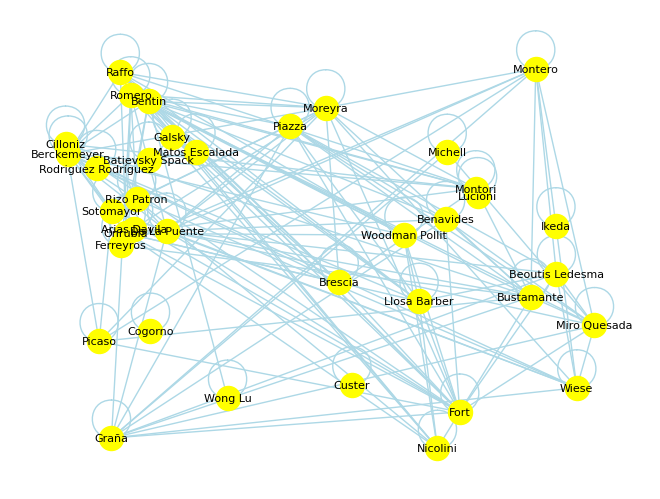

In [33]:
# plot
nx.draw_random(EliteNet,
                node_color='yellow',
                edge_color='lightblue',
                with_labels=True,
                font_size=8)

The adjacency include the self-relationships, we should take those away:

In [34]:
EliteNet.remove_edges_from(nx.selfloop_edges(EliteNet))

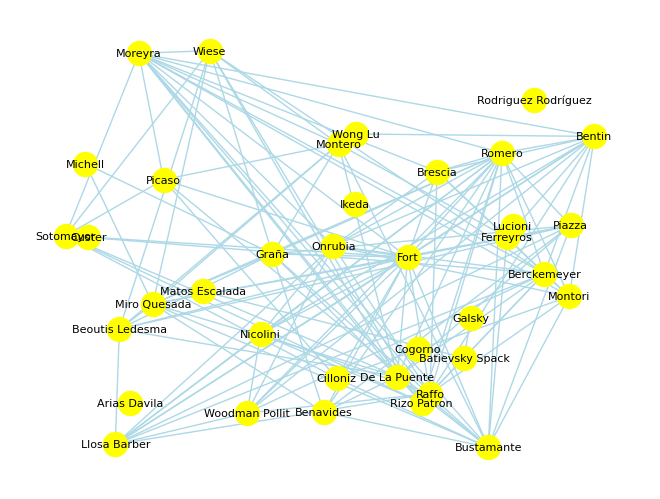

In [35]:
# re plot
nx.draw_random(EliteNet,
                node_color='yellow',
                edge_color='lightblue',
                with_labels=True,
                font_size=8)

Let's add the attributes to the nodes:

In [36]:
FigueData['Multinacional'].head()

Romero          1
Graña           1
Miro Quesada    1
Moreyra         1
Fort            1
Name: Multinacional, dtype: int64

Currently:

In [37]:
# no attribute:
EliteNet.nodes.data()

NodeDataView({'Romero': {}, 'Graña': {}, 'Miro Quesada': {}, 'Moreyra': {}, 'Fort': {}, 'De La Puente': {}, 'Wiese': {}, 'Onrubia': {}, 'Brescia': {}, 'Nicolini': {}, 'Montero': {}, 'Picaso': {}, 'Bentin': {}, 'Benavides': {}, 'Bustamante': {}, 'Woodman Pollit': {}, 'Raffo': {}, 'Piazza': {}, 'Berckemeyer': {}, 'Llosa Barber': {}, 'Beoutis Ledesma': {}, 'Rizo Patron': {}, 'Montori': {}, 'Sotomayor': {}, 'Cilloniz': {}, 'Ferreyros': {}, 'Michell': {}, 'Wong Lu': {}, 'Batievsky Spack': {}, 'Matos Escalada': {}, 'Galsky': {}, 'Lucioni': {}, 'Rodriguez Rodríguez': {}, 'Custer': {}, 'Ikeda': {}, 'Cogorno': {}, 'Arias Davila': {}})

Let me prepare a dictionary:

In [38]:
dict(zip(FigueData.index,FigueData['Multinacional']))

{'Romero': 1,
 'Graña': 1,
 'Miro Quesada': 1,
 'Moreyra': 1,
 'Fort': 1,
 'De La Puente': 1,
 'Wiese': 1,
 'Onrubia': 1,
 'Brescia': 1,
 'Nicolini': 1,
 'Montero': 1,
 'Picaso': 1,
 'Bentin': 1,
 'Benavides': 1,
 'Bustamante': 1,
 'Woodman Pollit': 1,
 'Raffo': 1,
 'Piazza': 1,
 'Berckemeyer': 0,
 'Llosa Barber': 1,
 'Beoutis Ledesma': 1,
 'Rizo Patron': 1,
 'Montori': 1,
 'Sotomayor': 1,
 'Cilloniz': 1,
 'Ferreyros': 0,
 'Michell': 0,
 'Wong Lu': 1,
 'Batievsky Spack': 1,
 'Matos Escalada': 1,
 'Galsky': 0,
 'Lucioni': 0,
 'Rodriguez Rodríguez': 1,
 'Custer': 0,
 'Ikeda': 0,
 'Cogorno': 0,
 'Arias Davila': 1}

Then, I can use that to add an attribute to the node:

In [39]:
attributeToAdd=dict(zip(FigueData.index,FigueData['Multinacional']))
nx.set_node_attributes(EliteNet, attributeToAdd,'multi')

Updated nodes:

In [40]:
EliteNet.nodes.data()

NodeDataView({'Romero': {'multi': 1}, 'Graña': {'multi': 1}, 'Miro Quesada': {'multi': 1}, 'Moreyra': {'multi': 1}, 'Fort': {'multi': 1}, 'De La Puente': {'multi': 1}, 'Wiese': {'multi': 1}, 'Onrubia': {'multi': 1}, 'Brescia': {'multi': 1}, 'Nicolini': {'multi': 1}, 'Montero': {'multi': 1}, 'Picaso': {'multi': 1}, 'Bentin': {'multi': 1}, 'Benavides': {'multi': 1}, 'Bustamante': {'multi': 1}, 'Woodman Pollit': {'multi': 1}, 'Raffo': {'multi': 1}, 'Piazza': {'multi': 1}, 'Berckemeyer': {'multi': 0}, 'Llosa Barber': {'multi': 1}, 'Beoutis Ledesma': {'multi': 1}, 'Rizo Patron': {'multi': 1}, 'Montori': {'multi': 1}, 'Sotomayor': {'multi': 1}, 'Cilloniz': {'multi': 1}, 'Ferreyros': {'multi': 0}, 'Michell': {'multi': 0}, 'Wong Lu': {'multi': 1}, 'Batievsky Spack': {'multi': 1}, 'Matos Escalada': {'multi': 1}, 'Galsky': {'multi': 0}, 'Lucioni': {'multi': 0}, 'Rodriguez Rodríguez': {'multi': 1}, 'Custer': {'multi': 0}, 'Ikeda': {'multi': 0}, 'Cogorno': {'multi': 0}, 'Arias Davila': {'multi': 1

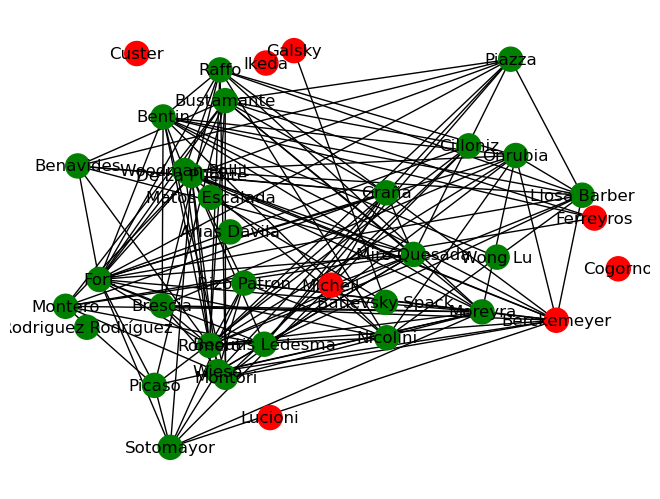

In [41]:
# using node attributes

colors_for_nodes=['green' if n[1]['multi']==1 else 'red' for n in EliteNet.nodes.data()]
nx.draw_random(EliteNet,
        with_labels=True,
        node_color=colors_for_nodes)

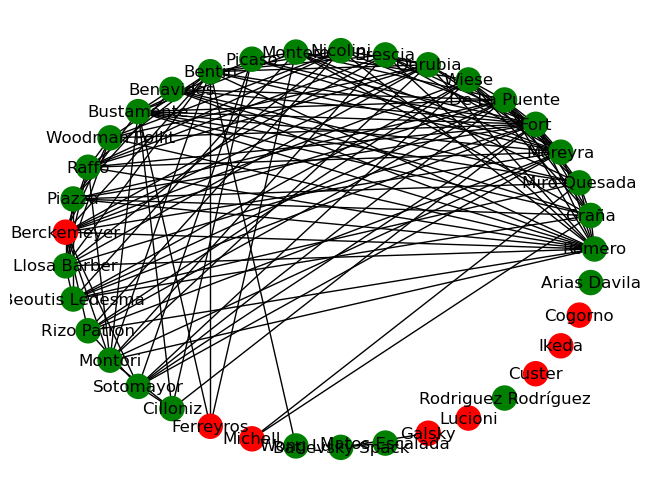

In [42]:
nx.draw_circular(EliteNet,
        with_labels=True,
        node_color=colors_for_nodes)

Let's export this graph:

In [43]:
nx.write_graphml(EliteNet, os.path.join("graphdata","EliteNet.graphml"),encoding='utf-8')

# Case: Trade among countries

Let me use some information about trade among countries from the [World Bank](https://wits.worldbank.org/gptad/library.aspx):

In [44]:
url = "https://wits.worldbank.org/gptad/library.aspx"
from IPython.display import IFrame
IFrame(url, 900,500)

I have pre processed the data somewhere [else](https://nbviewer.org/github/SocialAnalytics-StrategicIntelligence/codes/blob/main/preprocessingTradeData.ipynb). This is the file you need:

In [45]:
tradeDF=pd.read_pickle(os.path.join("graphdata","tradeData_forGraph.pkl"))

The dataframe has the column _Membership_. In that column, each cell includes all the countries that have signed a particular trade agreement.

In [46]:
tradeDF.head()

,Common Name,Membership,Type,Date of Signature,Date of Entry into Force,WTO notified,In-force status,Membership_list
0,AEC,"Algeria, Angola, Benin, Botswana, Burkina Faso...",Regional/Plurilateral Free Trade Agreement,06/03/1991,NaN,no,in force,"[Algeria, Angola, Benin, Botswana, Burkina Fas..."
1,Afghanistan - India,"Afghanistan, India",Bilateral Free Trade Agreement,03/06/2003,05/13/2003,yes,in force,"[Afghanistan, India]"
2,Afghanistan - India,"Afghanistan, India",Bilateral Free Trade Agreement,03/06/2003,05/13/2003,yes,in force,"[Afghanistan, India]"
3,Afghanistan - India,"Afghanistan, India",Bilateral Free Trade Agreement,03/06/2003,NaN,no,unknown,"[Afghanistan, India]"
4,Agadir (Egypt - Jordan - Morocco - Tunisia),"Egypt, Jordan, Morocco, Tunisia",Regional/Plurilateral Free Trade Agreement,02/25/2004,NaN,no,unknown,"[Egypt, Jordan, Morocco, Tunisia]"


For instance, these are the Agadit and Arab Maghreb Union treaties:

In [47]:
tradeDF.iloc[[4,14],[0,1,7]]

,Common Name,Membership,Membership_list
4,Agadir (Egypt - Jordan - Morocco - Tunisia),"Egypt, Jordan, Morocco, Tunisia","[Egypt, Jordan, Morocco, Tunisia]"
14,Arab Maghreb Union,"Morocco, Tunisia, Algeria, Libya, Mauritania","[Morocco, Tunisia, Algeria, Libya, Mauritania]"


The column **Membership_list** has been created so that all the countries that appear as a _string_ of countries, are now a list of countries.

In [48]:
#compare:
tradeDF.loc[4,'Membership']

'Egypt, Jordan, Morocco, Tunisia'

In [49]:
tradeDF.loc[4,'Membership_list']

['Egypt', 'Jordan', 'Morocco', 'Tunisia']

The column membership_list is the one we need to create a network:

In [50]:
# all the pairs

from itertools import combinations

list(combinations(tradeDF.loc[4,'Membership_list'], 2))

[('Egypt', 'Jordan'),
 ('Egypt', 'Morocco'),
 ('Egypt', 'Tunisia'),
 ('Jordan', 'Morocco'),
 ('Jordan', 'Tunisia'),
 ('Morocco', 'Tunisia')]

All the pairs above represent nodes and edges, then:

In [51]:
import networkx as nx

trade_test1 = nx.Graph(combinations(tradeDF.loc[4,'Membership_list'], 2))

In [52]:
# see nodes for 1st agreement
trade_test1.nodes()

NodeView(('Egypt', 'Jordan', 'Morocco', 'Tunisia'))

In [53]:
# see edges for 1st agreement
trade_test1.edges()

EdgeView([('Egypt', 'Jordan'), ('Egypt', 'Morocco'), ('Egypt', 'Tunisia'), ('Jordan', 'Morocco'), ('Jordan', 'Tunisia'), ('Morocco', 'Tunisia')])

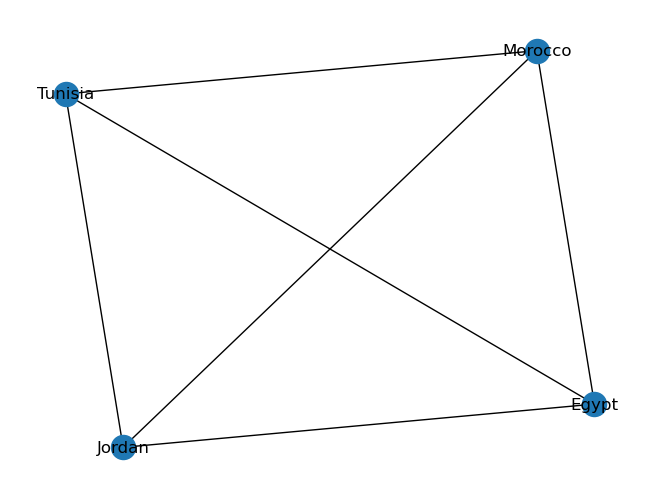

In [54]:
#draw the graph
nx.draw(trade_test1, with_labels=True)

Let's do that for the other treaty:

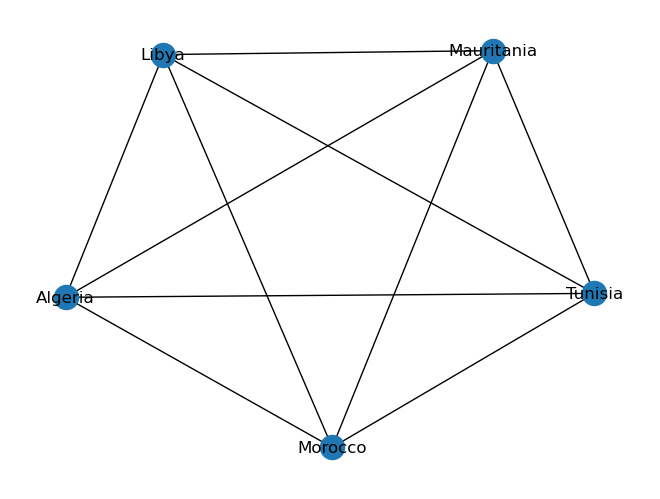

In [55]:
trade_test2 = nx.Graph(combinations(tradeDF.loc[14,'Membership_list'], 2))
nx.draw(trade_test2, with_labels=True)

As you see, each treaty can be represented as a full connected network. That is, the whole data is a collection of networks. Then, let's make a network of networks:

In [56]:
# weighted MultiGraph
Multi_test = nx.MultiGraph()
for countries_Agreement in tradeDF.loc[[4,14],'Membership_list']:
    allPairs=combinations(countries_Agreement, 2)
    for country1,country2 in allPairs:
        Multi_test.add_edge(country1,country2,weight=1)

This is what you get:

In [57]:
Multi_test.edges(data=True)

MultiEdgeDataView([('Egypt', 'Jordan', {'weight': 1}), ('Egypt', 'Morocco', {'weight': 1}), ('Egypt', 'Tunisia', {'weight': 1}), ('Jordan', 'Morocco', {'weight': 1}), ('Jordan', 'Tunisia', {'weight': 1}), ('Morocco', 'Tunisia', {'weight': 1}), ('Morocco', 'Tunisia', {'weight': 1}), ('Morocco', 'Algeria', {'weight': 1}), ('Morocco', 'Libya', {'weight': 1}), ('Morocco', 'Mauritania', {'weight': 1}), ('Tunisia', 'Algeria', {'weight': 1}), ('Tunisia', 'Libya', {'weight': 1}), ('Tunisia', 'Mauritania', {'weight': 1}), ('Algeria', 'Libya', {'weight': 1}), ('Algeria', 'Mauritania', {'weight': 1}), ('Libya', 'Mauritania', {'weight': 1})])

In [58]:
# easier to see:
[(a,b,c) for a,b,c in Multi_test.edges(data=True)]

[('Egypt', 'Jordan', {'weight': 1}),
 ('Egypt', 'Morocco', {'weight': 1}),
 ('Egypt', 'Tunisia', {'weight': 1}),
 ('Jordan', 'Morocco', {'weight': 1}),
 ('Jordan', 'Tunisia', {'weight': 1}),
 ('Morocco', 'Tunisia', {'weight': 1}),
 ('Morocco', 'Tunisia', {'weight': 1}),
 ('Morocco', 'Algeria', {'weight': 1}),
 ('Morocco', 'Libya', {'weight': 1}),
 ('Morocco', 'Mauritania', {'weight': 1}),
 ('Tunisia', 'Algeria', {'weight': 1}),
 ('Tunisia', 'Libya', {'weight': 1}),
 ('Tunisia', 'Mauritania', {'weight': 1}),
 ('Algeria', 'Libya', {'weight': 1}),
 ('Algeria', 'Mauritania', {'weight': 1}),
 ('Libya', 'Mauritania', {'weight': 1})]

However, notice that we have repeated edges, then we can create a new graph where the weight tells us in hoe many agreements a pair of countries is together:

In [59]:
G_test = nx.Graph() # new graph
for country1,country2,attributes in Multi_test.edges(data=True):
    weightNow = attributes['weight'] 
    if G_test.has_edge(country1,country2):
        G_test[country1][country2]['weight'] += 1
    else:
        G_test.add_edge(country1,country2, weight=weightNow)

You get:

In [60]:
G_test.edges(data=True)

EdgeDataView([('Egypt', 'Jordan', {'weight': 1}), ('Egypt', 'Morocco', {'weight': 1}), ('Egypt', 'Tunisia', {'weight': 1}), ('Jordan', 'Morocco', {'weight': 1}), ('Jordan', 'Tunisia', {'weight': 1}), ('Morocco', 'Tunisia', {'weight': 2}), ('Morocco', 'Algeria', {'weight': 1}), ('Morocco', 'Libya', {'weight': 1}), ('Morocco', 'Mauritania', {'weight': 1}), ('Tunisia', 'Algeria', {'weight': 1}), ('Tunisia', 'Libya', {'weight': 1}), ('Tunisia', 'Mauritania', {'weight': 1}), ('Algeria', 'Libya', {'weight': 1}), ('Algeria', 'Mauritania', {'weight': 1}), ('Libya', 'Mauritania', {'weight': 1})])

In [61]:
# easier to see:
[(a,b,c) for a,b,c in G_test.edges(data=True)]

[('Egypt', 'Jordan', {'weight': 1}),
 ('Egypt', 'Morocco', {'weight': 1}),
 ('Egypt', 'Tunisia', {'weight': 1}),
 ('Jordan', 'Morocco', {'weight': 1}),
 ('Jordan', 'Tunisia', {'weight': 1}),
 ('Morocco', 'Tunisia', {'weight': 2}),
 ('Morocco', 'Algeria', {'weight': 1}),
 ('Morocco', 'Libya', {'weight': 1}),
 ('Morocco', 'Mauritania', {'weight': 1}),
 ('Tunisia', 'Algeria', {'weight': 1}),
 ('Tunisia', 'Libya', {'weight': 1}),
 ('Tunisia', 'Mauritania', {'weight': 1}),
 ('Algeria', 'Libya', {'weight': 1}),
 ('Algeria', 'Mauritania', {'weight': 1}),
 ('Libya', 'Mauritania', {'weight': 1})]

See both networks as one:

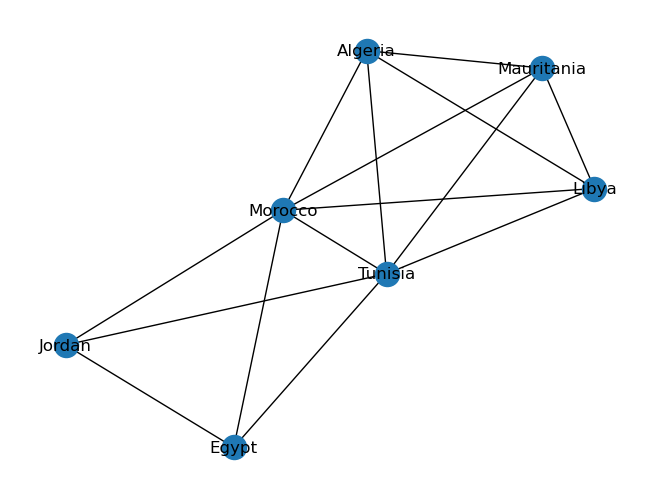

In [62]:
nx.draw(G_test, with_labels=True)

We can use the attribute for plotting:

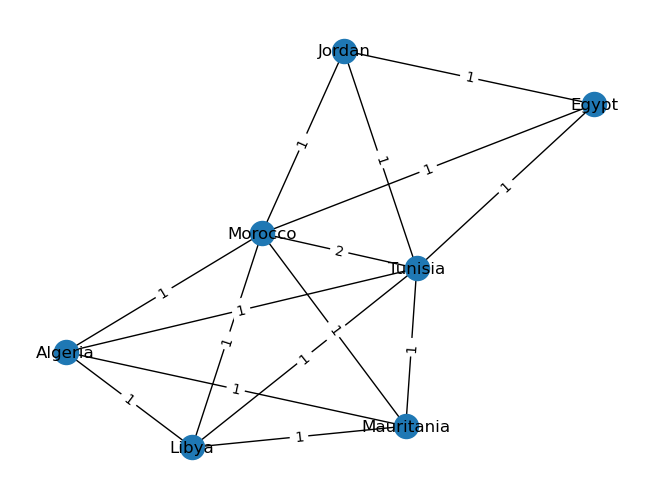

In [63]:
# use the edge attributes
# add labels to edges

weight_values = nx.get_edge_attributes(G_test,'weight') # recovering 'weights'
pos = nx.spring_layout(G_test) # position of the nodes
nx.draw(G_test,
        pos, # using "position"
        with_labels=True)
# adding labels
final_dG=nx.draw_networkx_edge_labels(G_test,pos,edge_labels=weight_values)

Let's redo this for the whole data (every agreement):

In [64]:
Multi_all = nx.MultiGraph()
for countries_Agreement in tradeDF.loc[:,'Membership_list']:
    allPairs=combinations(countries_Agreement, 2)
    for country1,country2 in allPairs:
        Multi_all.add_edge(country1,country2,weight=1)


G_all = nx.Graph() # new graph
for country1,country2,attributes in Multi_all.edges(data=True):
    weightNow = attributes['weight'] 
    if G_all.has_edge(country1,country2):
        G_all[country1][country2]['weight'] += 1
    else:
        G_all.add_edge(country1,country2, weight=weightNow)

We have these amount of nodes and edges:

In [65]:
len(G_all.nodes()),len(G_all.edges())

(224, 5082)

We are not supposed to have isolates:

In [66]:
list(nx.isolates(G_all))

[]

There should not be self loops:

In [67]:
nx.number_of_selfloops(G_all)

2

In [68]:
# which are they?
[e for e in nx.selfloop_edges(G_all)]

[('United Kingdom', 'United Kingdom'), ('Croatia', 'Croatia')]

We may remove those edges:

In [69]:
G_all.remove_edges_from(nx.selfloop_edges(G_all))

We can use the edges to create a dataframe:

In [70]:
tradeEdges_DF=nx.to_pandas_edgelist(G_all)
tradeEdges_DF

,source,target,weight
0,Algeria,Angola,1
1,Algeria,Benin,2
2,Algeria,Botswana,1
3,Algeria,Burkina Faso,1
4,Algeria,Burundi,1
...,...,...,...
5075,Marshall Islands,Samoa,1
5076,Micronesia,Palau,1
5077,Micronesia,Samoa,1
5078,Palau,Samoa,1


You can see a ranking of countries according to mutual interaction:

In [71]:
tradeEdges_DF.sort_values(by=['weight'],ascending=False)

,source,target,weight
2158,Denmark,United Kingdom,52
2079,Belgium,United Kingdom,51
2388,Germany,United Kingdom,51
2610,Italy,United Kingdom,51
2753,Netherlands,United Kingdom,51
...,...,...,...
1925,Morocco,Iran,1
1927,Morocco,Korea,1
1928,Morocco,Malaysia,1
1929,Morocco,Mexico,1


In [72]:
# here too:
tradeEdges_DF.weight.value_counts()

weight
1     3637
2      623
3      229
15     132
4      116
14      60
5       44
7       37
36      28
16      22
6       20
50      17
45      16
13      13
8       13
49      12
17       9
46       8
37       6
20       5
29       5
51       5
44       4
19       4
9        3
35       3
47       2
38       2
48       1
52       1
28       1
21       1
10       1
Name: count, dtype: int64

A barplot of the previous table:

<Axes: xlabel='weight'>

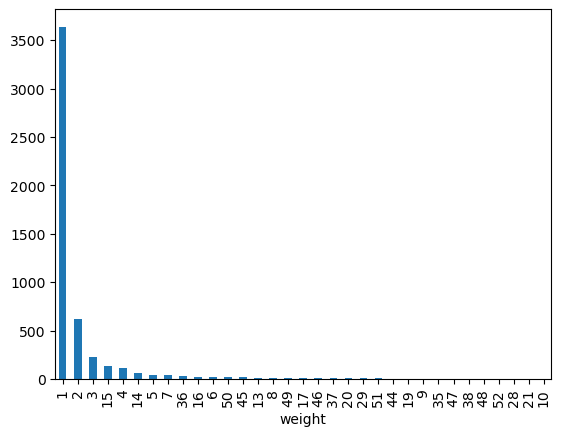

In [73]:
tradeEdges_DF.weight.value_counts().plot(kind='bar')

Let's try some visuals:

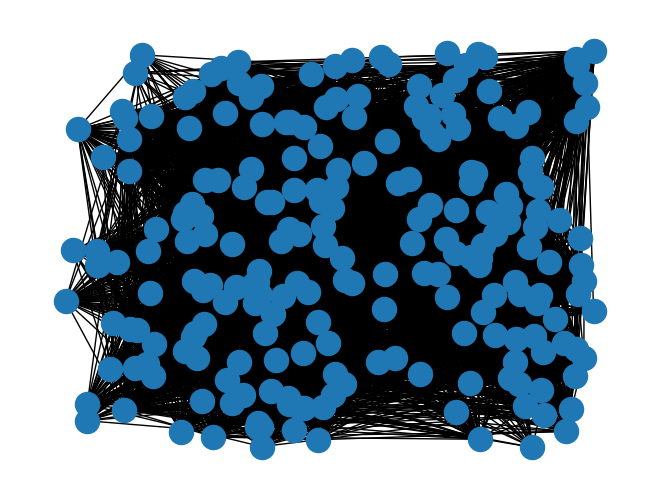

In [74]:
nx.draw_random(G_all)

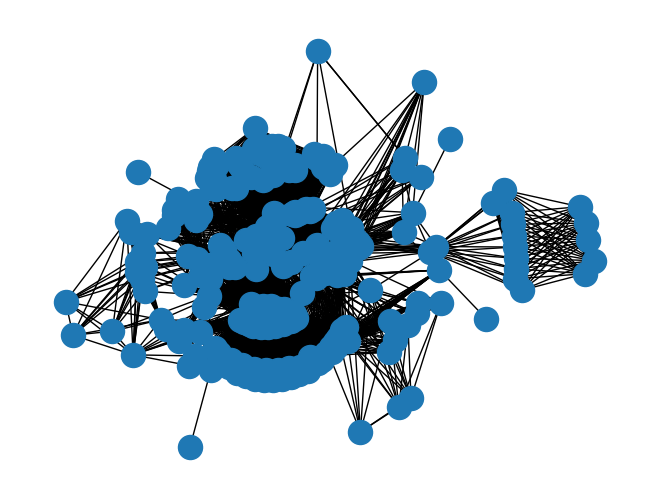

In [75]:
nx.draw_kamada_kawai(G_all)

Time to save:

In [ ]:
nx.write_graphml(G_all, os.path.join("graphdata","trade_graph.graphml"),encoding='utf-8')